In [1]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
sns.set_context("poster")


from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def go_back(look_back, df):
    #Create previous Day price column 
    
    for i in range(look_back):
        name = 'Previous_Day_Price' + str(i)
        df[name] = df['Weighted_Price'].shift(+1+i)
        df.dropna(how='any', inplace=True)
        
    return df

def run(dataset, look_back, params,feature_names ):

    #Go back
    df = go_back(look_back, dataset)
    df = df.values

    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df)

    dataset = np.delete(df,(0), axis=1)
    labels = np.delete(df,(1,2,3,4,5,6,7,8,9), axis=1).ravel()

    x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, shuffle = False)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, shuffle = False)
    
    eval_set = [(x_val, y_val)]
    
    #Regressor
    rgr =  xgb.XGBRegressor(**params)
    rgr.fit(x_train, y_train, early_stopping_rounds=3, eval_metric="rmse", eval_set=eval_set, verbose=True)
    
    
    #Train For Feature Importance
    dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=feature_names)
    xg_reg = xgb.train(params=params, dtrain=dtrain, num_boost_round=10)

    prediction = rgr.predict(x_train)
    print('\n Train Score: %.5f RMSE' % math.sqrt(mean_squared_error(prediction,y_train)))

    prediction = rgr.predict(x_test)
    print('\n Test Score: %.5f RMSE' % math.sqrt(mean_squared_error(prediction,y_test)))
    
    #plot the values
    plt.figure(figsize=(20,10))
    plt.title('XG Boost Prediction vs Real values')
    plt.plot(prediction, label='Prediction')
    plt.plot(y_test, label='Real Price')
    plt.legend()
    plt.show()
    
    return xg_reg

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


[0]	validation_0-rmse:0.052888
Will train until validation_0-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:0.031112
[2]	validation_0-rmse:0.027566
[3]	validation_0-rmse:0.025295
[4]	validation_0-rmse:0.02572
[5]	validation_0-rmse:0.024481
[6]	validation_0-rmse:0.025415
[7]	validation_0-rmse:0.024883
[8]	validation_0-rmse:0.024498
Stopping. Best iteration:
[5]	validation_0-rmse:0.024481


 Train Score: 0.01796 RMSE

 Test Score: 0.01798 RMSE


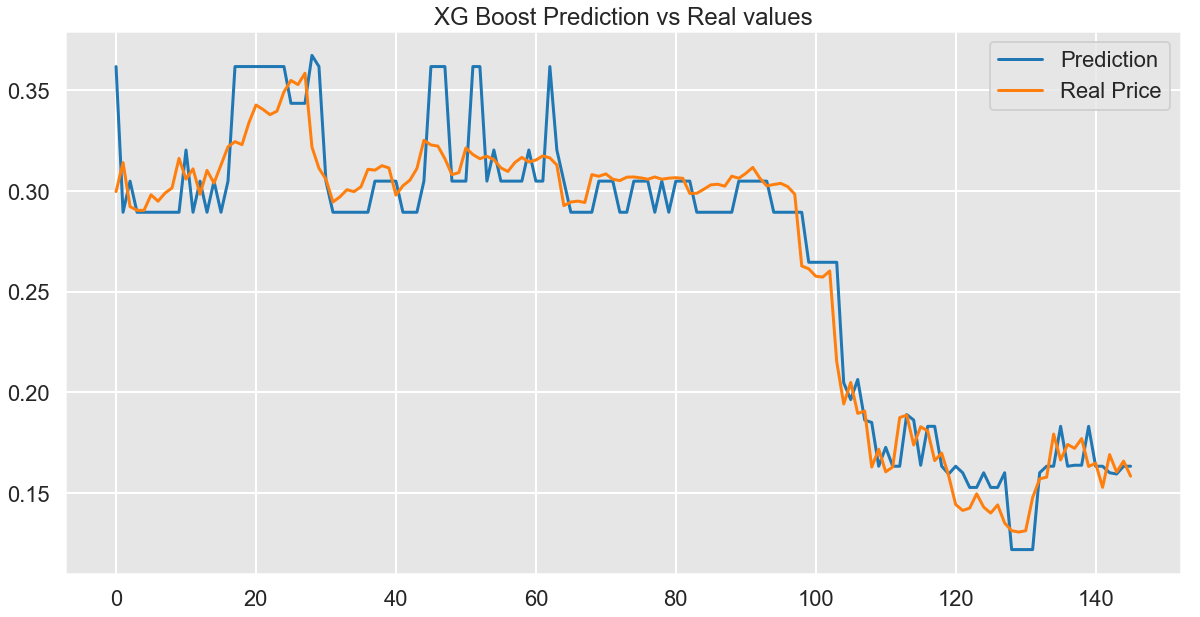

In [3]:
params = {
    
    'booster' : 'gbtree',
    'eval_metric' : 'rmse',
    'tree_method' : 'gpu_hist',
    'early_stopping_round' : 10,
    'grow_policy' : 'lossguide',
    'random_state' : 1234,
    'n_jobs' : -1,
    
    
    'learning_rate' : 0.72,
    'min_child_weight' : 1.0,
    'subsample': 0.9,
    'gamma' : 4.83,
    'lambda': 0.2,
    'colsample_bytree': 1.0,
    'max_depth': 10, 

    }

feature_names=['Previous_Day_Price0',]

df = pd.read_csv('fulldata.csv')
#Drop np.nan
df.dropna(how='any', inplace=True)

df = df[['Weighted_Price']]

rgr = run(df,1, params, feature_names)

[0]	validation_0-rmse:0.041321
Will train until validation_0-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:0.036362


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


[2]	validation_0-rmse:0.035638
[3]	validation_0-rmse:0.036888
[4]	validation_0-rmse:0.037199
[5]	validation_0-rmse:0.036982
Stopping. Best iteration:
[2]	validation_0-rmse:0.035638


 Train Score: 0.01057 RMSE

 Test Score: 0.02656 RMSE


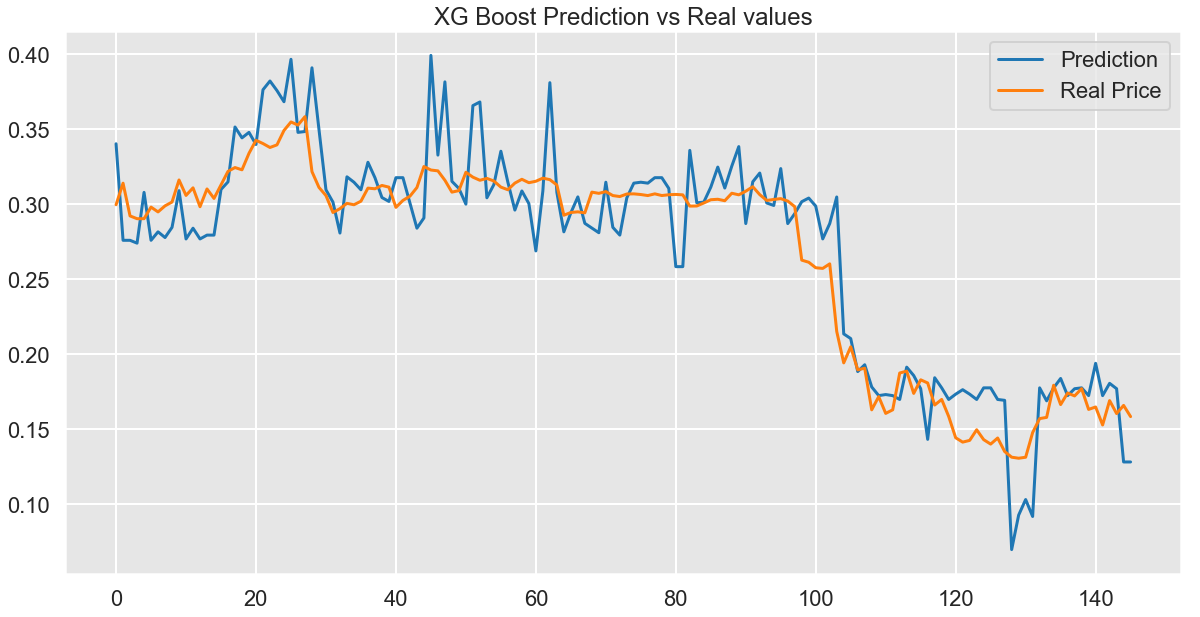

In [4]:
params = {
    
    'booster' : 'gbtree',
    'eval_metric' : 'rmse',
    'tree_method' : 'gpu_hist',
    'early_stopping_round' : 10,
    'grow_policy' : 'lossguide',
    'random_state' : 1234,
    'n_jobs' : -1,
    
    
    'learning_rate' : 0.88,
    'min_child_weight' : 1.0,
    'subsample': 0.9,
    'gamma' : 9.43,
    'lambda': 0.9,
    'colsample_bytree': 0.8,
    'max_depth': 12, 

    }

feature_names=['Previous_Day_Price0', 'Polarity_Textblob', 'Trend_Values', 'Polarity_Vader']

df = pd.read_csv('fulldata.csv')
#Drop np.nan
df.dropna(how='any', inplace=True)

df = df[['Weighted_Price', 'Polarity_Textblob', 'Trend_Values', 'Polarity_Vader']]

rgr = run(df,1, params, feature_names)